In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.metrics import fbeta_score, precision_score, recall_score
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv("dataset.csv")
# Проверим данные
df.info() # Пропусков нет
df.describe() # Выбросов нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

AGE      SMOKING  YELLOW_FINGERS      ANXIETY  PEER_PRESSURE  \
count  3000.000000  3000.000000     3000.000000  3000.000000    3000.000000   
mean     55.169000     1.491000        1.514000     1.494000       1.499000   
std      14.723746     0.500002        0.499887     0.500047       0.500082   
min      30.000000     1.000000        1.000000     1.000000       1.000000   
25%      42.000000     1.000000        1.000000     1.000000       1.000000   
50%      55.000000     1.000000        2.000000     1.000000       1.000000   
75%      68.000000     2.000000        2.000000     2.000000       2.000000   
max      80.000000     2.000000        2.000000     2.000000       2.000000   

       CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count      3000.000000  3000.000000  3000.000000  3000.000000   
mean          1.509667     1.489667     1.506667     1.497333   
std           0.499990     0.499977     0.500039     0.500076   
min           1.000000     1.000000     1.000000     1.000000   
25%           1.000000     1.000000     1.000000     1.000000   
50%           2.000000     1.000000     2.000000     1.000000   
75%           2.000000     2.000000     2.000000     2.000000   
max           2.000000     2.000000     2.000000     2.000000   

       ALCOHOL_CONSUMING     COUGHING  SHORTNESS_OF_BREATH  \
count        3000.000000  3000.000000          3000.000000   
mean            1.491333     1.510667             1.488000   
std             0.500008     0.499970             0.499939   
min             1.000000     1.000000             1.000000   
25%             1.000000     1.000000             1.000000   
50%             1.000000     2.000000             1.000000   
75%             2.000000     2.000000             2.000000   
max             2.000000     2.000000             2.000000   

       SWALLOWING_DIFFICULTY   CHEST_PAIN  
count            3000.000000  3000.000000  
mean                1.489667     1.498667  
std                 0.499977     0.500082  
min                 1.000000     1.000000  
25%                 1.000000     1.000000  
50%                 1.000000     1.000000  
75%                 2.000000     2.000000  
max                 2.000000     2.000000

In [26]:
# Разбиение на возрастные категории по риску
def age(_age):
  if _age < 20:
    return 0
  elif 20 >= _age < 40:
    return 1
  elif 40 >= _age < 60:
    return 2
  else:
    return 3
df['AGE'] = df['AGE'].apply(age)

In [27]:
# Кодируем категориальные данные
df['GENDER'] = df['GENDER'].map({'M':0, 'F':1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO':0, 'YES':1})

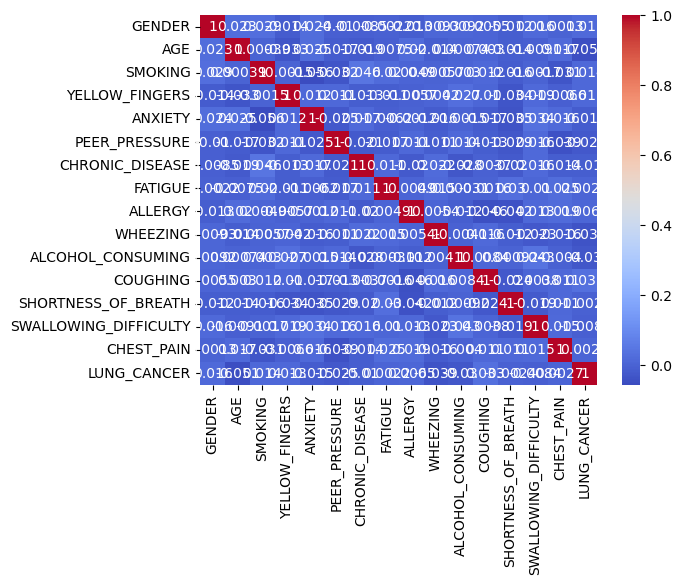

In [28]:
# Проверяем на отсутствие зависимых данных
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show() # Корреляций нет

In [32]:
scaler = StandardScaler()
# Разделяем данные на обучающую и тестовую выборки
X = df.drop(columns=['LUNG_CANCER'])  # Признаки (features)
y = df['LUNG_CANCER']  # Целевая переменная (target)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X = scaler.fit_transform(X)
history = []
# Цикл подбора гиперпараметров
for  depth in range(8, 9):
    for lr in np.arange(0.05, 0.5, 0.05):
        for iterr in range(100, 200, 50):
            reg = CatBoostClassifier(iterations = iterr, learning_rate = lr, depth = depth)
            cvs = cross_val_score(reg, X, y, cv=5, scoring="accuracy")
            mean_cvs = np.mean(cvs)
            history.append((np.abs(mean_cvs),depth, lr,iterr))

0:	learn: 0.6907511	total: 7.8ms	remaining: 772ms
1:	learn: 0.6882061	total: 18.2ms	remaining: 890ms
2:	learn: 0.6858430	total: 21.9ms	remaining: 708ms
3:	learn: 0.6834342	total: 31.6ms	remaining: 759ms
4:	learn: 0.6833719	total: 33.3ms	remaining: 632ms
5:	learn: 0.6811896	total: 40.1ms	remaining: 628ms
6:	learn: 0.6789050	total: 50.3ms	remaining: 668ms
7:	learn: 0.6785334	total: 52.5ms	remaining: 603ms
8:	learn: 0.6783413	total: 53ms	remaining: 535ms
9:	learn: 0.6782711	total: 53.3ms	remaining: 480ms
10:	learn: 0.6757263	total: 57.1ms	remaining: 462ms
11:	learn: 0.6737197	total: 65ms	remaining: 477ms
12:	learn: 0.6712188	total: 70.2ms	remaining: 470ms
13:	learn: 0.6684593	total: 75ms	remaining: 461ms
14:	learn: 0.6662854	total: 82.7ms	remaining: 468ms
15:	learn: 0.6639510	total: 86.7ms	remaining: 455ms
16:	learn: 0.6617095	total: 100ms	remaining: 490ms
17:	learn: 0.6593622	total: 111ms	remaining: 506ms
18:	learn: 0.6593332	total: 112ms	remaining: 479ms
19:	learn: 0.6569806	total: 127m

In [33]:
sorted(history)[::-1]

[(np.float64(0.5170833333333333), 8, np.float64(0.05), 150),
 (np.float64(0.5129166666666667), 8, np.float64(0.35000000000000003), 100),
 (np.float64(0.5120833333333333), 8, np.float64(0.25), 100),
 (np.float64(0.5120833333333333), 8, np.float64(0.05), 100),
 (np.float64(0.5116666666666666), 8, np.float64(0.35000000000000003), 150),
 (np.float64(0.5095833333333333), 8, np.float64(0.45), 100),
 (np.float64(0.5091666666666667), 8, np.float64(0.25), 150),
 (np.float64(0.5091666666666665), 8, np.float64(0.1), 150),
 (np.float64(0.50875), 8, np.float64(0.1), 100),
 (np.float64(0.5083333333333334), 8, np.float64(0.4), 150),
 (np.float64(0.5070833333333333), 8, np.float64(0.15000000000000002), 150),
 (np.float64(0.5066666666666667), 8, np.float64(0.45), 150),
 (np.float64(0.5045833333333333), 8, np.float64(0.4), 100),
 (np.float64(0.5033333333333333), 8, np.float64(0.3), 100),
 (np.float64(0.5033333333333333), 8, np.float64(0.15000000000000002), 100),
 (np.float64(0.5016666666666667), 8, np.f

In [15]:
## Разделяем данные на обучающую и тестовую выборки
#X = df.drop(columns=['LUNG_CANCER'])  # Признаки (features)
#y = df['LUNG_CANCER']  # Целевая переменная (target)
#X, X_test, y, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
#
## Создаём объект KFold для кросс-валидации
#kf = KFold(n_splits=5, shuffle=True, random_state=42)
#hyperscore={}
## Создаём scaler для стандартизации
#scaler = StandardScaler()
#hyperscore_val={}
#hyperscore_test={}
#
## здесь будет цикл для перебора гиперпараметров
#for k in range(8, 9):
#    for j in tqdm(range(5, 50, 5)):
#        j=j/100
#        for i in range(100, 200, 50):
#            score_test=[]
#            score_val=[]
#            clf = CatBoostClassifier(iterations = i, learning_rate = j, depth = k)
#            # Кросс-валидация
#            score_lst=[]
#            for train_index, val_index in kf.split(X):
#                
#                X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#                # Применение стандартизации к числовым признакам (сначала обучаем скейлер на обучающих данных)
#                X_train_scaled = scaler.fit_transform(X_train)
#                # Применение обученного скейлера к тестовой выборке
#                X_val_scaled = scaler.transform(X_val)
#                y_train, y_val = y.iloc[train_index], y.iloc[val_index]
#                
#                # Обучение и тестирование модели происходит внутри этого цикла
#                clf.fit(X_train_scaled, y_train)
#                y_pred = clf.predict(X_val)
#
#                # Смотрим precision и recall
#                prec = precision_score(y_val, y_pred)
#                rec = recall_score(y_val, y_pred)
#                score_val.append((prec, rec))
#                
#                # Используем метрику F-beta score
#                score = fbeta_score(y_val, y_pred, beta=0.8)
#                score_lst.append(score)
#            hyperscore[(i,j,k)] = np.mean(score_lst)
#            X_test_scaled = scaler.transform(X_test)
#            y_pred = clf.predict(X_test_scaled)
#            prec = precision_score(y_test, y_pred)
#            rec = recall_score(y_test, y_pred)
#            score_test.append((prec, rec))
#            hyperscore_val[(i,j,k)] = tuple(map(np.mean, zip(*score_val)))
#            hyperscore_test[(i,j,k)] = (prec, rec)
#best_param = list(hyperscore.keys())[(list(hyperscore.values()).index(max(hyperscore.values())))]
#print(best_param)

  0%|                                                                                                                | 0/9 [00:00<?, ?it/s]

0:	learn: 0.6905867	total: 5.72ms	remaining: 566ms
1:	learn: 0.6879703	total: 9.98ms	remaining: 489ms
2:	learn: 0.6852553	total: 14ms	remaining: 454ms
3:	learn: 0.6827862	total: 18.2ms	remaining: 436ms
4:	learn: 0.6803229	total: 21.8ms	remaining: 415ms
5:	learn: 0.6775245	total: 25.5ms	remaining: 400ms
6:	learn: 0.6753580	total: 30ms	remaining: 398ms
7:	learn: 0.6730442	total: 40ms	remaining: 460ms
8:	learn: 0.6708016	total: 49.8ms	remaining: 503ms
9:	learn: 0.6682482	total: 58.4ms	remaining: 525ms
10:	learn: 0.6660407	total: 67.3ms	remaining: 544ms
11:	learn: 0.6635560	total: 76.2ms	remaining: 559ms
12:	learn: 0.6611760	total: 92.2ms	remaining: 617ms
13:	learn: 0.6590334	total: 100ms	remaining: 615ms
14:	learn: 0.6569409	total: 108ms	remaining: 613ms
15:	learn: 0.6544826	total: 119ms	remaining: 622ms
16:	learn: 0.6524542	total: 126ms	remaining: 617ms
17:	learn: 0.6501708	total: 151ms	remaining: 689ms
18:	learn: 0.6479015	total: 159ms	remaining: 676ms
19:	learn: 0.6478733	total: 162ms	

 11%|███████████▌                                                                                            | 1/9 [01:18<10:31, 78.98s/it]

0:	learn: 0.6880859	total: 3.54ms	remaining: 350ms
1:	learn: 0.6829834	total: 7.36ms	remaining: 360ms
2:	learn: 0.6777059	total: 10.9ms	remaining: 351ms
3:	learn: 0.6727403	total: 14.4ms	remaining: 346ms
4:	learn: 0.6678773	total: 17.9ms	remaining: 341ms
5:	learn: 0.6626246	total: 21.4ms	remaining: 336ms
6:	learn: 0.6585743	total: 25.1ms	remaining: 334ms
7:	learn: 0.6543975	total: 28.6ms	remaining: 329ms
8:	learn: 0.6500605	total: 32ms	remaining: 324ms
9:	learn: 0.6461916	total: 35.6ms	remaining: 321ms
10:	learn: 0.6423122	total: 39.6ms	remaining: 320ms
11:	learn: 0.6378976	total: 43.4ms	remaining: 319ms
12:	learn: 0.6340944	total: 46.9ms	remaining: 314ms
13:	learn: 0.6303349	total: 50.7ms	remaining: 311ms
14:	learn: 0.6265938	total: 55.1ms	remaining: 312ms
15:	learn: 0.6223632	total: 58.9ms	remaining: 309ms
16:	learn: 0.6183125	total: 62.6ms	remaining: 306ms
17:	learn: 0.6147205	total: 66.6ms	remaining: 303ms
18:	learn: 0.6115473	total: 70.5ms	remaining: 300ms
19:	learn: 0.6115138	tot

 22%|███████████████████████                                                                                 | 2/9 [02:27<08:31, 73.12s/it]

127:	learn: 0.3936209	total: 585ms	remaining: 100ms
128:	learn: 0.3922018	total: 589ms	remaining: 96ms
129:	learn: 0.3909342	total: 594ms	remaining: 91.3ms
130:	learn: 0.3896921	total: 597ms	remaining: 86.7ms
131:	learn: 0.3884246	total: 602ms	remaining: 82ms
132:	learn: 0.3868114	total: 606ms	remaining: 77.5ms
133:	learn: 0.3855685	total: 609ms	remaining: 72.8ms
134:	learn: 0.3840412	total: 613ms	remaining: 68.1ms
135:	learn: 0.3828644	total: 617ms	remaining: 63.5ms
136:	learn: 0.3816333	total: 621ms	remaining: 58.9ms
137:	learn: 0.3804902	total: 625ms	remaining: 54.3ms
138:	learn: 0.3790738	total: 628ms	remaining: 49.7ms
139:	learn: 0.3779151	total: 632ms	remaining: 45.1ms
140:	learn: 0.3764710	total: 636ms	remaining: 40.6ms
141:	learn: 0.3748499	total: 640ms	remaining: 36ms
142:	learn: 0.3738057	total: 643ms	remaining: 31.5ms
143:	learn: 0.3727101	total: 647ms	remaining: 27ms
144:	learn: 0.3714665	total: 651ms	remaining: 22.4ms
145:	learn: 0.3699392	total: 654ms	remaining: 17.9ms
14

 33%|██████████████████████████████████▋                                                                     | 3/9 [03:34<07:01, 70.18s/it]

147:	learn: 0.2896939	total: 617ms	remaining: 8.34ms
148:	learn: 0.2885963	total: 623ms	remaining: 4.18ms
149:	learn: 0.2873603	total: 627ms	remaining: 0us
0:	learn: 0.6832565	total: 7.09ms	remaining: 702ms
1:	learn: 0.6731597	total: 11.2ms	remaining: 549ms
2:	learn: 0.6631992	total: 15.4ms	remaining: 499ms
3:	learn: 0.6539742	total: 19.6ms	remaining: 470ms
4:	learn: 0.6449501	total: 23.6ms	remaining: 447ms
5:	learn: 0.6356103	total: 27.7ms	remaining: 434ms
6:	learn: 0.6285721	total: 31.5ms	remaining: 419ms
7:	learn: 0.6202342	total: 35.7ms	remaining: 411ms
8:	learn: 0.6120247	total: 39.8ms	remaining: 403ms
9:	learn: 0.6047782	total: 43.7ms	remaining: 393ms
10:	learn: 0.5988119	total: 47.4ms	remaining: 383ms
11:	learn: 0.5917171	total: 51.5ms	remaining: 377ms
12:	learn: 0.5859071	total: 55.5ms	remaining: 372ms
13:	learn: 0.5803635	total: 59.4ms	remaining: 365ms
14:	learn: 0.5752496	total: 63.1ms	remaining: 357ms
15:	learn: 0.5689472	total: 66.8ms	remaining: 351ms
16:	learn: 0.5621561	t

 44%|██████████████████████████████████████████████▏                                                         | 4/9 [04:43<05:47, 69.56s/it]

122:	learn: 0.2688126	total: 500ms	remaining: 110ms
123:	learn: 0.2674685	total: 503ms	remaining: 106ms
124:	learn: 0.2659127	total: 507ms	remaining: 101ms
125:	learn: 0.2643061	total: 511ms	remaining: 97.3ms
126:	learn: 0.2630849	total: 514ms	remaining: 93.1ms
127:	learn: 0.2616201	total: 518ms	remaining: 89ms
128:	learn: 0.2604504	total: 521ms	remaining: 84.9ms
129:	learn: 0.2590988	total: 525ms	remaining: 80.8ms
130:	learn: 0.2576732	total: 529ms	remaining: 76.7ms
131:	learn: 0.2565102	total: 533ms	remaining: 72.7ms
132:	learn: 0.2553734	total: 536ms	remaining: 68.6ms
133:	learn: 0.2543421	total: 540ms	remaining: 64.5ms
134:	learn: 0.2530553	total: 545ms	remaining: 60.5ms
135:	learn: 0.2519254	total: 548ms	remaining: 56.5ms
136:	learn: 0.2509280	total: 552ms	remaining: 52.4ms
137:	learn: 0.2499973	total: 556ms	remaining: 48.4ms
138:	learn: 0.2486417	total: 560ms	remaining: 44.3ms
139:	learn: 0.2473017	total: 563ms	remaining: 40.2ms
140:	learn: 0.2462564	total: 567ms	remaining: 36.2m

 56%|█████████████████████████████████████████████████████████▊                                              | 5/9 [05:44<04:26, 66.66s/it]

145:	learn: 0.2076026	total: 609ms	remaining: 16.7ms
146:	learn: 0.2067106	total: 614ms	remaining: 12.5ms
147:	learn: 0.2054497	total: 617ms	remaining: 8.34ms
148:	learn: 0.2041943	total: 621ms	remaining: 4.17ms
149:	learn: 0.2030508	total: 625ms	remaining: 0us
0:	learn: 0.6786609	total: 3.8ms	remaining: 376ms
1:	learn: 0.6641365	total: 8.18ms	remaining: 401ms
2:	learn: 0.6499881	total: 11.7ms	remaining: 378ms
3:	learn: 0.6355700	total: 15.5ms	remaining: 373ms
4:	learn: 0.6233530	total: 19.3ms	remaining: 367ms
5:	learn: 0.6106602	total: 23ms	remaining: 361ms
6:	learn: 0.6009473	total: 26.8ms	remaining: 355ms
7:	learn: 0.5895936	total: 30.7ms	remaining: 353ms
8:	learn: 0.5799384	total: 34.9ms	remaining: 353ms
9:	learn: 0.5696052	total: 38.4ms	remaining: 345ms
10:	learn: 0.5612111	total: 41.8ms	remaining: 338ms
11:	learn: 0.5533686	total: 46.4ms	remaining: 340ms
12:	learn: 0.5454164	total: 50.2ms	remaining: 336ms
13:	learn: 0.5388346	total: 53.9ms	remaining: 331ms
14:	learn: 0.5314514	to

 67%|█████████████████████████████████████████████████████████████████████▎                                  | 6/9 [06:46<03:14, 64.84s/it]

138:	learn: 0.1847025	total: 614ms	remaining: 48.6ms
139:	learn: 0.1834844	total: 618ms	remaining: 44.1ms
140:	learn: 0.1825890	total: 622ms	remaining: 39.7ms
141:	learn: 0.1814310	total: 626ms	remaining: 35.3ms
142:	learn: 0.1805077	total: 631ms	remaining: 30.9ms
143:	learn: 0.1796665	total: 636ms	remaining: 26.5ms
144:	learn: 0.1786124	total: 641ms	remaining: 22.1ms
145:	learn: 0.1776173	total: 645ms	remaining: 17.7ms
146:	learn: 0.1766681	total: 649ms	remaining: 13.2ms
147:	learn: 0.1756815	total: 652ms	remaining: 8.81ms
148:	learn: 0.1747135	total: 656ms	remaining: 4.4ms
149:	learn: 0.1736755	total: 660ms	remaining: 0us
0:	learn: 0.6764509	total: 5.62ms	remaining: 556ms
1:	learn: 0.6598544	total: 9.52ms	remaining: 467ms
2:	learn: 0.6437777	total: 13.5ms	remaining: 437ms
3:	learn: 0.6298994	total: 17.3ms	remaining: 415ms
4:	learn: 0.6157593	total: 21.3ms	remaining: 404ms
5:	learn: 0.6017120	total: 25.3ms	remaining: 396ms
6:	learn: 0.5909257	total: 29.1ms	remaining: 387ms
7:	learn: 0

 78%|████████████████████████████████████████████████████████████████████████████████▉                       | 7/9 [07:47<02:07, 63.56s/it]

149:	learn: 0.1557296	total: 748ms	remaining: 0us
0:	learn: 0.6743009	total: 3.78ms	remaining: 375ms
1:	learn: 0.6553848	total: 7.87ms	remaining: 386ms
2:	learn: 0.6378149	total: 12.7ms	remaining: 409ms
3:	learn: 0.6219654	total: 16.1ms	remaining: 386ms
4:	learn: 0.6062497	total: 19.8ms	remaining: 375ms
5:	learn: 0.5942209	total: 23.4ms	remaining: 366ms
6:	learn: 0.5825634	total: 27.2ms	remaining: 361ms
7:	learn: 0.5685729	total: 30.8ms	remaining: 354ms
8:	learn: 0.5574765	total: 34.4ms	remaining: 348ms
9:	learn: 0.5467070	total: 38ms	remaining: 342ms
10:	learn: 0.5365538	total: 43.9ms	remaining: 356ms
11:	learn: 0.5264848	total: 50.1ms	remaining: 367ms
12:	learn: 0.5177079	total: 53.9ms	remaining: 361ms
13:	learn: 0.5075663	total: 57.9ms	remaining: 356ms
14:	learn: 0.5005694	total: 61.7ms	remaining: 350ms
15:	learn: 0.4910860	total: 65.4ms	remaining: 343ms
16:	learn: 0.4813880	total: 69.4ms	remaining: 339ms
17:	learn: 0.4739290	total: 73.8ms	remaining: 336ms
18:	learn: 0.4662528	total

 89%|████████████████████████████████████████████████████████████████████████████████████████████▍           | 8/9 [08:48<01:02, 62.87s/it]

127:	learn: 0.1578953	total: 518ms	remaining: 88.9ms
128:	learn: 0.1570003	total: 522ms	remaining: 85ms
129:	learn: 0.1561117	total: 527ms	remaining: 81.1ms
130:	learn: 0.1550024	total: 531ms	remaining: 77ms
131:	learn: 0.1541774	total: 535ms	remaining: 72.9ms
132:	learn: 0.1534107	total: 538ms	remaining: 68.8ms
133:	learn: 0.1525962	total: 542ms	remaining: 64.8ms
134:	learn: 0.1515729	total: 546ms	remaining: 60.7ms
135:	learn: 0.1505289	total: 551ms	remaining: 56.7ms
136:	learn: 0.1496664	total: 556ms	remaining: 52.8ms
137:	learn: 0.1487255	total: 560ms	remaining: 48.7ms
138:	learn: 0.1478869	total: 564ms	remaining: 44.6ms
139:	learn: 0.1470714	total: 569ms	remaining: 40.6ms
140:	learn: 0.1462480	total: 572ms	remaining: 36.5ms
141:	learn: 0.1455175	total: 576ms	remaining: 32.5ms
142:	learn: 0.1448513	total: 579ms	remaining: 28.3ms
143:	learn: 0.1440040	total: 585ms	remaining: 24.4ms
144:	learn: 0.1430425	total: 587ms	remaining: 20.3ms
145:	learn: 0.1422456	total: 590ms	remaining: 16.2

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [09:51<00:00, 65.71s/it]

(100, 0.05, 8)


In [16]:
#print(hyperscore_val[(100, 0.05, 8)])
#print(hyperscore_test[(100, 0.05, 8)])

(np.float64(0.5059259259259259), np.float64(1.0))
(0.5277777777777778, 0.5)


In [17]:
#print(list(filter(lambda _a: _a[0]>0.50, sorted(hyperscore_val.values(), key=lambda _a: _a[0]))))
#print("\n\n\n\n")
#print(list(filter(lambda _a: _a[0]>0.50, sorted(hyperscore_test.values(), key=lambda _a: _a[0]))))

[(np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0)), (np.float64(0.5059259259259259), np.float64(1.0))]





[(0.5100671140939598, 0.5), (0.5234899328859061, 0.5131578947368421), (0.524